In [4]:
import pandas as pd
import seaborn as srn
import statistics  as sts
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import numpy as np

In [5]:
df= pd.read_csv('supermarket.csv', sep=',')

In [6]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


<AxesSubplot:ylabel='Gender,Product line'>

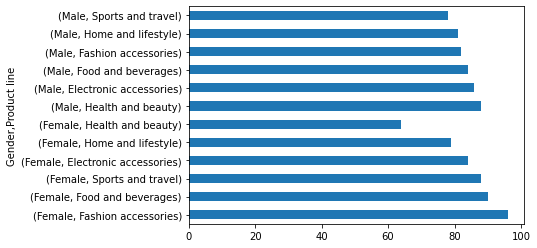

In [126]:
#Visualizando as vendas das categoria de produtos dessa rede de supermercados, por genero

df.groupby('Gender')['Product line'].value_counts().plot.barh()

In [ ]:
#Genero dos compradores dessa rede
df['Gender'].value_counts()

<AxesSubplot:xlabel='Gender'>

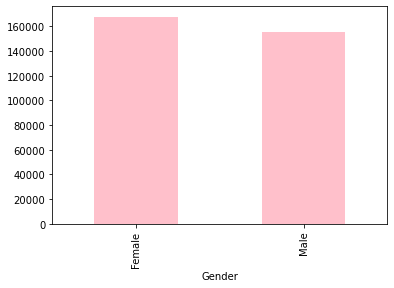

In [7]:
#Identificando entre homens e mulheres quem consome mais nessa rede
df.groupby('Gender')['Total'].sum().plot.bar(color = 'pink')

In [5]:
prod = df.groupby(['Product line']).sum()
prod

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7
Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5
Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0
Sports and travel,9460.88,920,2624.8965,55122.8265,52497.93,790.476190,2624.8965,1148.1


In [79]:
df =df.drop('Date', axis = 1)

In [28]:
df=df.drop('gross margin percentage', axis =1)

In [8]:
#Vamos catalogar os clientes que compram produtos na margem de preço de 90 ~ 100
ven_price = df.loc[(df['Unit price'] > 90 ) & (df['Unit price'] < 100) ]

ven_price.value_counts()
#Verifica-se 127 pessoas nessa categoria

Invoice ID   Branch  City       Customer type  Gender  Product line            Unit price  Quantity  Tax 5%   Total     Date       Time   Payment      cogs    gross margin percentage  gross income  Rating
109-28-2512  B       Mandalay   Member         Female  Fashion accessories     97.61       6         29.2830  614.9430  1/7/2019   15:01  Ewallet      585.66  4.761905                 29.2830       9.9       1
618-34-8551  A       Yangon     Normal         Female  Sports and travel       93.18       2         9.3180   195.6780  1/16/2019  18:41  Credit card  186.36  4.761905                 9.3180        8.5       1
678-79-0726  C       Naypyitaw  Member         Female  Sports and travel       90.63       9         40.7835  856.4535  1/18/2019  15:28  Cash         815.67  4.761905                 40.7835       5.1       1
677-11-0152  C       Naypyitaw  Normal         Female  Food and beverages      93.26       9         41.9670  881.3070  1/16/2019  18:08  Cash         839.34  4.7619

In [99]:
#Considerando que o produto de beleza, vamos verificar os compradores da categoria
df.loc[(df['Product line'] == 'Health and beauty') & (df['Unit price'] > 90)] 

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Buyer
33,A,Yangon,0,Male,Health and beauty,96.58,2,202.8180,High
80,C,Naypyitaw,0,Female,Health and beauty,99.19,6,624.8970,High
111,C,Naypyitaw,1,Female,Health and beauty,98.21,3,309.3615,High
141,C,Naypyitaw,1,Male,Health and beauty,90.50,10,950.2500,High
158,B,Mandalay,1,Male,Health and beauty,97.22,9,918.7290,High
274,B,Mandalay,0,Female,Health and beauty,99.71,6,628.1730,High
283,A,Yangon,1,Male,Health and beauty,99.83,6,628.9290,High
415,B,Mandalay,0,Male,Health and beauty,96.11,1,100.9155,High
798,B,Mandalay,0,Male,Health and beauty,92.78,1,97.4190,High
818,B,Mandalay,1,Male,Health and beauty,96.16,4,403.8720,High


In [100]:
#Vamos verificar se existe relação entre as Colunas citadas a baixo(Qnto mais prox de 1 ou -1 mais forte a relaçao)
#Definimos Customet type, Member =1. Normal = 0
corr= df.corr()

In [101]:
Relaço 
corr.style.background_gradient(cmap='coolwarm')

,Customer type,Unit price,Quantity,Total
Customer type,1.000000,0.020238,0.016763,0.019670
Unit price,0.020238,1.000000,0.010778,0.633962
Quantity,0.016763,0.010778,1.000000,0.705510
Total,0.019670,0.633962,0.705510,1.000000


In [9]:
from scipy import stats


In [107]:
#Criando mais uma coluna para categoriizar que seria comprador desse produto (High
df.loc[(df['Product line'] == 'Health and beauty') & (df['Unit price'] > 90),'Buyer'] = 'High'

In [10]:
df.head(20)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [103]:
df.head(2)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Buyer
0,A,Yangon,1,Female,Health and beauty,74.69,7,548.9715,No
1,C,Naypyitaw,0,Female,Electronic accessories,15.28,5,80.2200,No


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [73]:
df['Customer type'] =df['Customer type'].astype('int64')

In [76]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Buyer
0,750-67-8428,A,Yangon,1,Female,Health and beauty,74.69,7,548.9715,1/5/2019,No
1,226-31-3081,C,Naypyitaw,0,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,No


In [110]:
#Verificando quantos potenciais(High) compradores para esse produto
df['Buyer'].value_counts()
#Verificamos 127 clientes em potencial

No      873
High    127
Name: Buyer, dtype: int64

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz

#from sklearn.tree import export_graphviz
#conda install -c conda-forge python-graphviz (para evitar warnings)

ModuleNotFoundError: No module named 'graphviz'

In [80]:
df.head(1)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Buyer
0,A,Yangon,1,Female,Health and beauty,74.69,7,548.9715,No


In [111]:
previsores = df.iloc[:,0:8].values
classe = df.iloc[:,8].values


In [112]:
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,1] = labelencoder.fit_transform(previsores[:,1])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])
previsores[:, 4] = labelencoder.fit_transform(previsores[:, 4])


In [114]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.4,
                                                                  random_state = 0)

In [115]:
# Criação e treinamento do modelo
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [116]:
previsoes = arvore.predict(X_teste)
previsoes

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'High', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'High', 'No', 'No',
       'No', 'No', 'No', 'High', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'High', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'High', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'High', 'No', 'No', 'No', 'No',
       'High', 'No', 'No', 'High', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'High', 'No',
       'High', 'No', 'No', 'High', 'No', 'No', 'No', 'No', 'High', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'High', 'No', 'No', 'High',
       'No', 'No', 'No', 'No', 'No', 'No', 'No'

In [117]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 47,   0],
       [  0, 353]], dtype=int64)

In [118]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

1.0

In [119]:
taxa_erro = 1 - taxa_acerto
taxa_erro

0.0

In [ ]:
O modelo Apresenta uma acuracia de 100% os possiveis futuros compradores do produto
Modelo testado com 40% da  amostra apresentou um numero de 47 prossiveis clientes para essa categoria de produto

In [1]:
df=df.drop('gross margin percentage', axis =1)
df=df.drop('gross margin percentage', axis =1)
df=df.drop('gross margin percentage', axis =1)
df=df.drop('gross margin percentage', axis =1)
df=df.drop('gross margin percentage', axis =1)

NameError: name 'df' is not defined